<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

In [2]:
!pip install statsmodels

In [3]:
!pip install numpy

In [4]:
!pip install scipy

In [5]:
!pip install pandas

In [6]:
!pip install sklearn

In [7]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 12.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
!pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 8.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [9]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [10]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
df=pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (2018, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
1,2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
3,2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
4,2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...,...
2013,2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2014,2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2015,2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813
2016,2020-01-08,297.160004,304.439911,297.156006,303.190002,299.284088,33090946


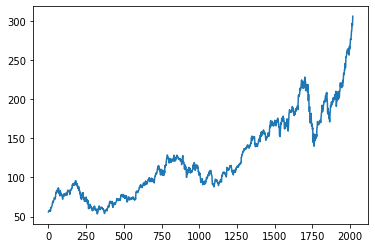

In [12]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [18]:
# Train test split
to_row = int(len(df)*0.667)
print(to_row)

1346


In [20]:
#training_data = list(df[0:to_row]['Adj Close'])
#testing_data = list(df[to_row:]['Adj Close'])
training_data = list(df[0:1345]['Adj Close'])
testing_data = list(df[1345:]['Adj Close'])
testing_data

[150.441696,
 149.7285,
 150.557343,
 152.65995800000002,
 152.26873799999998,
 152.043808,
 146.938858,
 149.178391,
 149.686951,
 150.596466,
 150.410645,
 149.9608,
 150.479126,
 150.224823,
 150.283493,
 149.393509,
 149.804276,
 152.02426100000002,
 150.537735,
 151.04631,
 151.94606000000002,
 151.57437099999999,
 145.69683799999999,
 142.21533200000002,
 143.359543,
 141.961075,
 141.110199,
 139.134735,
 143.115036,
 141.814346,
 142.655396,
 142.42067,
 143.05633500000002,
 142.60652199999998,
 140.562546,
 142.61625700000002,
 140.513626,
 140.84616100000002,
 140.33763100000002,
 140.914597,
 139.584564,
 141.00263999999999,
 141.86326599999998,
 142.322891,
 142.528275,
 144.51353500000002,
 145.755539,
 146.264099,
 146.77261399999998,
 147.691925,
 147.02688600000002,
 146.958435,
 148.738327,
 149.374023,
 150.078125,
 147.24205,
 146.205399,
 145.452347,
 146.743271,
 153.677032,
 152.141647,
 152.943604,
 155.310211,
 156.552246,
 157.510651,
 152.045822,
 154.160278,


In [21]:
print (len(training_data))
print(len(testing_data))

1345
673


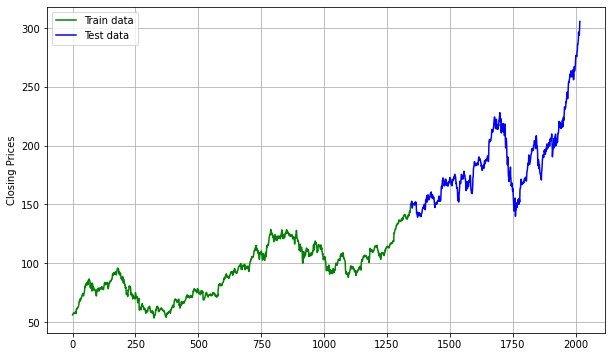

In [22]:
plt.figure(figsize=(10,6))
plt.grid(True)
#plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label= 'Test data')
plt.legend()

In [24]:
model_predict = []
n_test_ob = len(testing_data)   
n_test_ob

673

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_ob):
  #model = ARIMA(testing_data, order=(1,1,1))
  model = sm.tsa.arima.ARIMA(testing_data, order=(1,1,1))
  #model = sm.tsa.ARIMA(testing_data, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  #yhat = output[0]
  yhat = list(output[0])[0]
  model_predict.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  print('predicted=%f, expected=%f' % (yhat, actual_test_value))

In [70]:
from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_ob):
  model = sm.tsa.arima.ARIMA(testing_data, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predict.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  print('predicted=%f, expected=%f' % (yhat, actual_test_value))

predicted=305.472139, expected=150.441696
predicted=305.472139, expected=149.728500
predicted=305.472139, expected=150.557343
predicted=305.472139, expected=152.659958
predicted=305.472139, expected=152.268738
predicted=305.472139, expected=152.043808
predicted=305.472139, expected=146.938858
predicted=305.472139, expected=149.178391
predicted=305.472139, expected=149.686951
predicted=305.472139, expected=150.596466
predicted=305.472139, expected=150.410645
predicted=305.472139, expected=149.960800
predicted=305.472139, expected=150.479126
predicted=305.472139, expected=150.224823
predicted=305.472139, expected=150.283493
predicted=305.472139, expected=149.393509
predicted=305.472139, expected=149.804276
predicted=305.472139, expected=152.024261
predicted=305.472139, expected=150.537735
predicted=305.472139, expected=151.046310
predicted=305.472139, expected=151.946060
predicted=305.472139, expected=151.574371
predicted=305.472139, expected=145.696838
predicted=305.472139, expected=142

In [80]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  673
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1689.372
Date:                Fri, 14 Jan 2022   AIC                           3384.745
Time:                        14:39:07   BIC                           3398.276
Sample:                             0   HQIC                          3389.985
                                - 673                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8732      0.193     -4.529      0.000      -1.251      -0.495
ma.L1          0.8939      0.177      5.053      0.000       0.547       1.241
sigma2         8.9352      0.316     28.301      0.000       8.316       9.554
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               305.50
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
len(model_predict)

3365

In [82]:
len(testing_data)

673

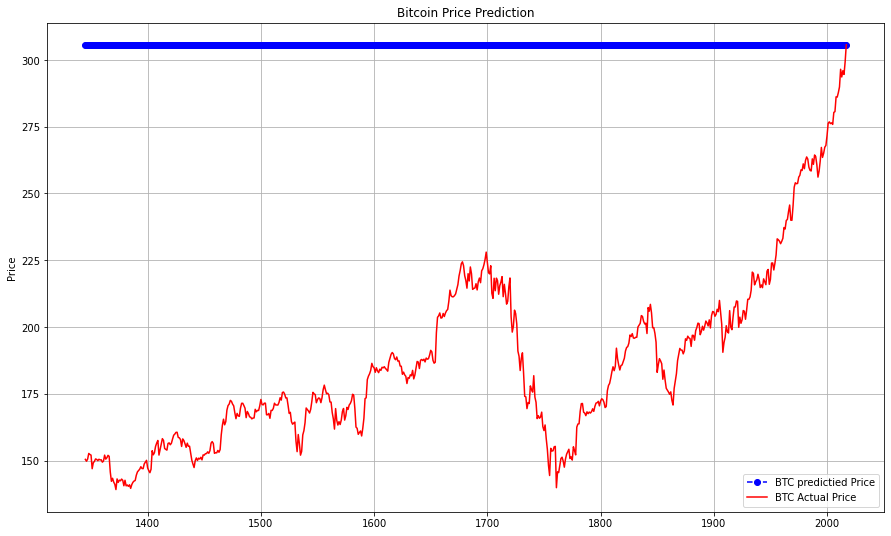

In [85]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[1345:].index

plt.plot(date_range , model_predict[:-2692], color = 'blue', marker = 'o', linestyle ='dashed', label = 'BTC predictied Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
#plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [86]:
#report performance
mape = np.mean(np.abs(np.array(model_predict[:-2692]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' + str(mape))

MAPE: 0.6834827748018358


In [87]:
from math import sqrt
mse = mean_squared_error(testing_data, model_predict[:-2692])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 123.401786
